In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

# Импорт данных и знакомство с ними

In [3]:
df = pd.read_csv('C:\\Users\\ASUS\\Desktop\\Netologiya\\DIPLOM\\britan\\data.csv', dtype = {'CustomerID':str})

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [52]:
(df.isna().mean() * 100).round(2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [ ]:
# имеем 541909 записей, в полях Description, Customer ID есть пустые значения, причем в поле Customer ID незаполнено
#почти четверть значений. Предположу, что покупки совершены незарегистрированными пользователями.
#InvoiceNo определился с типом Object, значит в каких-то записях присутствуют символы, хотя на первый взгляд поле состоит
#их цифр.

In [ ]:
#выведу  значения поля InvoiceNo с символами

In [6]:
df[df.InvoiceNo.str.contains(r'\D')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [96]:
df.groupby('Description').count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
Description,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,41,41,41,41,41,41,41,41,41,41
50'S CHRISTMAS GIFT BAG LARGE,130,130,130,130,130,130,130,130,130,130
DOLLY GIRL BEAKER,181,181,181,181,181,181,181,181,181,181
I LOVE LONDON MINI BACKPACK,88,88,88,88,88,88,88,88,88,88
I LOVE LONDON MINI RUCKSACK,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,278,278,278,278,278,278,278,278,278,278
ZINC TOP 2 DOOR WOODEN SHELF,14,14,14,14,14,14,14,14,14,14
ZINC WILLIE WINKIE CANDLE STICK,273,273,273,273,273,273,273,273,273,273


In [7]:
df[df.InvoiceNo.str.contains(r'\b[^1-9 C]')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [ ]:
#Почти все записи имеют букву C в начале номера чека (InvoiceNo), значения поля Quantity по этим записям отрицательные. 
#Предположу, что это сторнирующие операции. Также среди InvoiceNo с сиволами есть три записи со значением A
#в начале номера чека - списание плохих долгов.

In [55]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
# есть отрицательные значения в полях Quantity, UnitPrice. 

In [ ]:
#иследую отрицательные значения по полю Quantity

In [8]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [ ]:
#сразу обратила внимание на операции с символьным StockCode, выведу их, а также с одной цифрой в StockCode (C2)

In [9]:
df_not_buying = df[df.StockCode.str.contains(r'\b\D+[0-9]?$')]

In [10]:
df_not_buying

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526,Germany


In [11]:
df_not_buying.groupby(['StockCode', 'Description']).count().sort_values('Quantity', ascending = False)

,,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,Description,,,,,,
POST,POSTAGE,1252,1252,1252,1252,1196,1252
DOT,DOTCOM POSTAGE,709,709,709,709,16,709
M,Manual,571,571,571,571,465,571
C2,CARRIAGE,143,143,143,143,134,143
D,Discount,77,77,77,77,77,77
S,SAMPLES,63,63,63,63,0,63
BANK CHARGES,Bank Charges,37,37,37,37,12,37
AMAZONFEE,AMAZON FEE,34,34,34,34,0,34
CRUK,CRUK Commission,16,16,16,16,16,16


In [ ]:
# Почти 3000 строк в датафрейме не с покупками - банковские и другие комиссии, оплата AMAZON, скидки, образцы,
#корректировки долгов, какие-то ручные операции и пр. Среди них есть строки с отрицательным значением по полю Quantity
#(сторнирующие операции?). В эту выборку попали три товара GIRLS PARTY BAG, BOYS PARTY BAG, PADS TO MATCH ALL CUSHIONS.
#Информация за заказчика - необходимо иметь единую систему артикулов, в данном датасете есть артикулы состоящие только 
#из цифр, из цифр и символов, по трем товарам только символы. Возможно заведение в базу нового поля - флага (продажа и 
#служебная операция) 

In [ ]:
#Исключу 3 товара из этих данных

In [12]:
df_not_buying = df[df.StockCode.str.contains(r'\b\D+[0-9]?$')&~df.StockCode.str.contains('DCGSSBOY|DCGSSGIRL|PADS')]

In [13]:
df_not_buying.groupby(['StockCode', 'Description']).sum().sort_values('Quantity', ascending = False)

,,Quantity,UnitPrice
StockCode,Description,,
M,Manual,3164,214448.410
POST,POSTAGE,3003,46388.470
DOT,DOTCOM POSTAGE,707,206252.060
C2,CARRIAGE,140,7098.000
B,Adjust bad debt,3,-11062.060
m,Manual,1,2.550
BANK CHARGES,Bank Charges,-13,7505.641
CRUK,CRUK Commission,-16,7933.430
AMAZONFEE,AMAZON FEE,-30,249042.680


In [14]:
df_not_buying

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662,Germany
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526,Germany


In [15]:
df[df.StockCode.str.contains('gift')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher �40.00,1,12/20/2010 10:14,34.04,NaN,United Kingdom
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher �50.00,1,12/23/2010 13:26,42.55,NaN,United Kingdom
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,1,1/5/2011 14:44,25.53,NaN,United Kingdom
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,1/5/2011 14:44,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,1/13/2011 9:30,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,2/15/2011 17:51,16.67,NaN,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,1,2/17/2011 15:51,25.00,NaN,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher �30.00,1,2/18/2011 16:12,25.00,NaN,United Kingdom
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher �10.00,1,3/7/2011 17:14,8.33,NaN,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher �40.00,1,4/4/2011 15:54,33.33,NaN,United Kingdom


In [ ]:
#еще подарочные сертификаты встретились с артикулом необычного формата

In [ ]:
#создам на всякий случай список со служебными операциями

In [16]:
service_operations = ['POSTAGE', 'DOTCOM POSTAGE', 'Manual','CARRIAGE', 'Adjust bad debt', 'CRUK Commission', 'Bank Charges', 'AMAZON FEE', 'SAMPLES', 'Discount']

In [ ]:
#Продолжу иследовать отрицательные значения по полю Quantity

In [ ]:
#выведу для примера товар с артикулом 35004C

In [17]:
df[df['StockCode']=='35004C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6,12/1/2010 10:03,5.45,12431,Australia
297,536397,35004C,SET OF 3 COLOURED FLYING DUCKS,48,12/1/2010 10:51,4.65,17924,United Kingdom
2316,536576,35004C,SET OF 3 COLOURED FLYING DUCKS,120,12/1/2010 16:11,4.65,13777,United Kingdom
3933,536739,35004C,SET OF 3 COLOURED FLYING DUCKS,3,12/2/2010 13:08,5.45,14180,United Kingdom
6544,536947,35004C,SET OF 3 COLOURED FLYING DUCKS,3,12/3/2010 12:29,5.45,13013,United Kingdom
7417,537036,35004C,SET OF 3 COLOURED FLYING DUCKS,1,12/3/2010 17:28,5.45,15545,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/5/2010 13:55,4.65,15311,United Kingdom
17311,537700,35004C,SET OF 3 COLOURED FLYING DUCKS,48,12/8/2010 10:51,4.65,18229,United Kingdom
17451,537762,35004C,SET OF 3 COLOURED FLYING DUCKS,3,12/8/2010 12:01,5.45,16558,United Kingdom


In [18]:
#Проанализировав операции с одним артикулом предположу, что отрицательные значения в поле Quantity и значением в
#поле StockCode символом 'C' перед цифровым номером чека это возвраты, так как совпадают CustomerID - один и тот же
#покупатель сначала купил товар, потом вернул в том же или меньшем количестве. Для покупателя 15311 нет покупки перед
#первым возвратом, допускаю, что покупка была сделана ранее первой даты датасета. 

In [19]:
#Вывожу все строки с возвратами

In [20]:
df[df.InvoiceNo.str.contains(r'C\d+')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [21]:
df[(df['CustomerID'] == '15498')&(df['UnitPrice']>200)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom


In [ ]:
# отрицательные значения в поле Quantity это не только возвраты, но и банковские и другие комиссии, оплата AMAZON, скидки,
#образцы и какие-то ручные операции. По комиссиям, образцам и ручным операциям поле CustomerID пустое, значит моя 
#первоначальная догадка, что пустое поле CustomerID это покупки совершенные незарегистрированными пользователями не совсем
#некорректно, есть еще служебные сторнирующие операции, где в поле  CustomerID тоже NaN


# Очистка данных

In [ ]:
#Что делать с пустыми значения в поле CustomerID?

In [ ]:
#Заполню значением '00000' NaN в поле CustomerID, предварительно проверив, что такого значения нет в столбце

In [22]:
df[df['CustomerID']=='00000']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
df['CustomerID'].fillna('00000', inplace = True)

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [25]:
print(df['CustomerID'].isna().sum())

0


In [26]:
df[(df['StockCode']=='35004C')&(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/8/2010 13:18,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,12/20/2010 15:27,4.65,15311,United Kingdom
41696,C539956,35004C,SET OF 3 COLOURED FLYING DUCKS,-15,12/23/2010 12:55,4.65,12980,United Kingdom
73600,C542366,35004C,SET OF 3 COLOURED FLYING DUCKS,-10,1/27/2011 12:54,4.65,13777,United Kingdom
76680,C542638,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,1/31/2011 11:15,5.45,13396,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2/1/2011 12:14,4.65,15311,United Kingdom
80303,543035,35004C,NaN,-206,2/2/2011 15:51,0.00,00000,United Kingdom
86839,C543603,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2/10/2011 13:40,5.45,15570,United Kingdom
171721,551447,35004C,NaN,-4,4/28/2011 15:59,0.00,00000,United Kingdom


In [27]:
df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,00000,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,00000,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838,United Kingdom
...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,00000,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom


In [28]:
df.loc[df.CustomerID == '12346'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom


In [29]:
df.loc[df.CustomerID == '16446'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,16446,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,16446,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom


In [30]:
df[df['Description'].isnull()].count()

InvoiceNo      1454
StockCode      1454
Description       0
Quantity       1454
InvoiceDate    1454
UnitPrice      1454
CustomerID     1454
Country        1454
dtype: int64

In [ ]:
#вывожу записи с нулевой ценой

In [31]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,00000,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,00000,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,00000,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,00000,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,00000,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,00000,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,00000,United Kingdom


In [ ]:
#вывожу записи с нулевой ценой и незаполненным описанием

In [32]:
df[(df['UnitPrice']==0)&df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,00000,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,00000,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,00000,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,00000,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,00000,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,00000,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,00000,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,00000,United Kingdom


In [ ]:
#Выведу наиболее часто встречающиеся операции с нулевыми суммами по их описанию

In [33]:
df[df['UnitPrice']==0]['Description'].value_counts(sort = True).head(20)

check                              159
?                                   47
damages                             45
damaged                             43
found                               25
sold as set on dotcom               20
adjustment                          16
Damaged                             14
FRENCH BLUE METAL DOOR SIGN 1        9
Unsaleable, destroyed.               9
thrown away                          9
FRENCH BLUE METAL DOOR SIGN 8        8
amazon                               8
Found                                8
FRENCH BLUE METAL DOOR SIGN No       7
FRENCH BLUE METAL DOOR SIGN 3        7
??                                   7
RECIPE BOX PANTRY YELLOW DESIGN      7
OWL DOORSTOP                         7
FRENCH BLUE METAL DOOR SIGN 4        7
Name: Description, dtype: int64

In [34]:
#Принимаю решение удалить записи с нулевыми ценами, это тестовые, корректировочные или ошибочные операции,
#в большинстве записей поля Description и CustomerID пустые, так как нулевые суммы влияют на статистики

In [35]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [36]:
df.drop(df[df.UnitPrice == 0].index, inplace=True)

In [37]:
 df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [38]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,00000,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,00000,United Kingdom


In [39]:
df[df.StockCode == 'B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,00000,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,00000,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,00000,United Kingdom


In [ ]:
#Отрицательных сумм по полю UnitPrice две, они одинаковые, произведены в один день - списание плохого долга, 
#причем всего таких операций три, одна с положительной суммой. Оставлю эти записи, так они влияют на показатели.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539394 non-null  object 
 1   StockCode    539394 non-null  object 
 2   Description  539394 non-null  object 
 3   Quantity     539394 non-null  int64  
 4   InvoiceDate  539394 non-null  object 
 5   UnitPrice    539394 non-null  float64
 6   CustomerID   539394 non-null  object 
 7   Country      539394 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.0+ MB


In [41]:
df.describe()

,Quantity,UnitPrice
count,539394.000000,539394.000000
mean,9.845871,4.632614
std,215.412253,96.984656
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
#Теперь в датафрейме 539394 записи, средние показатели немного увеличились.
#Пустых значений не осталось, остались отрицательные значения в поле Quantity(сторно)и в поле UnitPrice (списание долгов).


# Какие задачи может поставить заказчик?

In [ ]:
1. Динамика объема продаж в целом и по странам
2. Динамика количества заказов в целом и по странам
3. Общий средний чек и в разрезе каждой страны
4. TOP-5 самых продаваемых товаров в целом и по каждой стране
5. ТОР-5 самых активных( часто покупающих) покупателей, из какой они страны
6. ТОР-5 покупателей, совершивших самые крупные покупки
7. Выделить почтовые сборы из объема продаж(количество и суммы по странам)
.
.
.
.
12. Спрогнозировать объемы продаж на следующие три месяца



# Анализ

In [ ]:
#Добавлю столбец с итоговой суммой (количество, умноженное на цену товара)

In [42]:
df['Total_price']=df.apply(lambda d: d['UnitPrice']*d['Quantity'], axis=1)

In [97]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60


In [ ]:
#выведу TOP-5 самых активных активных зарегистрированных пользователей

In [43]:
df.groupby('CustomerID').count().sort_values('Quantity', ascending = False).head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_price
CustomerID,,,,,,,,
00000,132605,132605,132605,132605,132605,132605,132605,132605
17841,7983,7983,7983,7983,7983,7983,7983,7983
14911,5901,5901,5901,5901,5901,5901,5901,5901
14096,5128,5128,5128,5128,5128,5128,5128,5128
12748,4641,4641,4641,4641,4641,4641,4641,4641
14606,2782,2782,2782,2782,2782,2782,2782,2782


In [44]:
df.groupby(['CustomerID', 'Country']).sum().tail()
#.sort_values('Total_price', ascending = False).head(11)

,,Quantity,UnitPrice,Total_price
CustomerID,Country,,,
18280,United Kingdom,45,47.65,180.60
18281,United Kingdom,54,39.36,80.82
18282,United Kingdom,98,62.68,176.60
18283,United Kingdom,1397,1220.93,2094.88
18287,United Kingdom,1586,104.55,1837.28


In [ ]:
#Помня, что CustomerID = '00000' это бывшие NaN, не беру их в расчет. Самый часто покупающий пользователь
#из зарегистрированных - 17841,
#пользователь, принесший самый большой доход - 14646.

In [ ]:
#Выведу самые популярные товары

In [45]:
df.groupby('Description').sum().sort_values('Quantity', ascending = False)

,Quantity,UnitPrice,Total_price
Description,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,173.39,13587.93
JUMBO BAG RED RETROSPOT,47359,5333.30,92356.03
ASSORTED COLOUR BIRD ORNAMENT,36381,2584.77,58959.73
POPCORN HOLDER,36334,874.50,33969.46
PACK OF 72 RETROSPOT CAKE CASES,36039,1047.04,21059.72
...,...,...,...
CRUK Commission,-16,7933.43,-7933.43
ASSORTED TUTTI FRUTTI ROUND BOX,-24,1.65,-39.60
AMAZON FEE,-30,249042.68,-221520.50


In [ ]:
#Выведу самые популярные товары по странам - здесь застряла на сортировке

In [46]:
df.groupby([ 'Country', 'Description']).sum()[['Quantity', 'Total_price']]
#.sort_values(['Country','Quantity'], ascending = False)

Quantity  Total_price
Country     Description                                         
Australia    DOLLY GIRL BEAKER                  200        216.0
             I LOVE LONDON MINI BACKPACK          4         16.6
            10 COLOUR SPACEBOY PEN               48         40.8
            12 PENCIL SMALL TUBE WOODLAND       384        211.2
            12 PENCILS TALL TUBE POSY           252         79.8
...                                             ...          ...
Unspecified WRAP POPPIES  DESIGN                 25         10.5
            WRAP SUKI AND FRIENDS                25         10.5
            WRAP VINTAGE PETALS  DESIGN          25         10.5
            WRAP WEDDING DAY                     25         10.5
            ZINC METAL HEART DECORATION           2          2.5

[19992 rows x 2 columns]

In [ ]:
#Выведу самые крупные покупки (самые большие суммы чеков)

In [ ]:
#df_buy = df[df['Quantity'] >0]

In [47]:
df.groupby(['InvoiceNo', 'CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).head(10)

,,,Quantity,UnitPrice,Total_price
InvoiceNo,CustomerID,Country,,,
581483,16446,United Kingdom,80995,2.08,168469.60
541431,12346,United Kingdom,74215,1.04,77183.60
574941,00000,United Kingdom,14149,498.89,52940.94
576365,00000,United Kingdom,13956,469.51,50653.91
556444,15098,United Kingdom,60,649.50,38970.00
567423,17450,United Kingdom,12572,36.77,31698.16
556917,12415,Australia,15049,283.57,22775.93
572209,18102,United Kingdom,1920,86.50,22206.00
567381,17450,United Kingdom,6760,42.60,22104.80


In [48]:
df.groupby(['InvoiceNo', 'CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).tail(10)

,,,Quantity,UnitPrice,Total_price
InvoiceNo,CustomerID,Country,,,
C537644,00000,United Kingdom,-1,13474.79,-13474.79
C537630,00000,United Kingdom,-1,13541.33,-13541.33
C537651,00000,United Kingdom,-1,13541.33,-13541.33
C540118,00000,United Kingdom,-1,16453.71,-16453.71
C540117,00000,United Kingdom,-1,16888.02,-16888.02
C580605,00000,United Kingdom,-1,17836.46,-17836.46
C550456,15749,United Kingdom,-9014,15.80,-22998.40
C556445,15098,United Kingdom,-1,38970.00,-38970.00
C541433,12346,United Kingdom,-74215,1.04,-77183.60


In [49]:
df[df['InvoiceNo']== '581483']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom,168469.6


In [50]:
df[df['CustomerID'] == '16446']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,16446,United Kingdom,1.65
194355,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,16446,United Kingdom,1.25
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom,168469.60
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446,United Kingdom,-168469.60


In [51]:
df.groupby(['InvoiceNo', 'CustomerID', 'Country']).sum().sort_values('Total_price', ascending = False).head(10)

,,,Quantity,UnitPrice,Total_price
InvoiceNo,CustomerID,Country,,,
581483,16446,United Kingdom,80995,2.08,168469.60
541431,12346,United Kingdom,74215,1.04,77183.60
574941,00000,United Kingdom,14149,498.89,52940.94
576365,00000,United Kingdom,13956,469.51,50653.91
556444,15098,United Kingdom,60,649.50,38970.00
567423,17450,United Kingdom,12572,36.77,31698.16
556917,12415,Australia,15049,283.57,22775.93
572209,18102,United Kingdom,1920,86.50,22206.00
567381,17450,United Kingdom,6760,42.60,22104.80


In [52]:
df[df['CustomerID']=='15098']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,6/10/2011 15:22,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.50,15098,United Kingdom,38970.0
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098,United Kingdom,-38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.50,15098,United Kingdom,649.5
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,6/10/2011 15:39,4.95,15098,United Kingdom,-297.0


In [ ]:
#Хотя самые крупные покупки среди зарегистрированных пользователей были сделаны покупателями 16446, 12346, 15098б 
#но по ним были оформлены возвраты.
#Также 2 крупные покупки совершены предположительно незарегистрированными пользователями из Великобритании. 
#Далее крупные покупки были совершены покупателями 17450, 18102, 17450 из Великобритании и 12415, 12415 из Австралии.

In [53]:
df[df['CustomerID']=='17450'].sort_values('Total_price', ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,9/20/2011 11:05,5.06,17450,United Kingdom,7144.72
52134,540689,22470,HEART OF WICKER LARGE,1284,1/11/2011 8:43,3.21,17450,United Kingdom,4121.64
348319,567423,23113,PANTRY CHOPPING BOARD,756,9/20/2011 11:05,5.06,17450,United Kingdom,3825.36
348323,567423,22722,SET OF 6 SPICE TINS PANTRY DESIGN,852,9/20/2011 11:05,4.25,17450,United Kingdom,3621.00
52132,540689,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1010,1/11/2011 8:43,3.24,17450,United Kingdom,3272.40
...,...,...,...,...,...,...,...,...,...
322132,C565229,POST,POSTAGE,-1,9/2/2011 9:12,200.00,17450,United Kingdom,-200.00
235379,C557638,POST,POSTAGE,-1,6/21/2011 16:01,545.58,17450,United Kingdom,-545.58
88210,C543789,M,Manual,-1,2/11/2011 17:10,856.48,17450,United Kingdom,-856.48
367063,C568832,23113,PANTRY CHOPPING BOARD,-186,9/29/2011 11:35,5.15,17450,United Kingdom,-957.90


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    539394 non-null  object 
 1   StockCode    539394 non-null  object 
 2   Description  539394 non-null  object 
 3   Quantity     539394 non-null  int64  
 4   InvoiceDate  539394 non-null  object 
 5   UnitPrice    539394 non-null  float64
 6   CustomerID   539394 non-null  object 
 7   Country      539394 non-null  object 
 8   Total_price  539394 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 41.2+ MB


In [ ]:
#выведу почтовые сборы

In [55]:
df[df['Description']== 'POSTAGE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583,France,54.0
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791,Netherlands,15.0
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662,Germany,18.0
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738,Germany,18.0
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686,France,18.0
...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,12/9/2011 10:10,15.0,12423,Belgium,15.0
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.0,12518,Germany,36.0
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.0,12662,Germany,18.0
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.0,12526,Germany,36.0


In [84]:
df_country = df.groupby('Country').sum().sort_values('UnitPrice', ascending = False).reset_index()

In [85]:
df_country

,Country,Quantity,UnitPrice,Total_price,Year,Month
0,United Kingdom,4399359,2.245715e+06,8.187806e+06,991344937,3734730
1,EIRE,142363,4.844719e+04,2.632768e+05,16473710,62933
2,France,110479,4.303199e+04,1.974039e+05,17205677,64328
3,Germany,117446,3.766600e+04,2.216982e+05,19089859,69200
4,Singapore,5234,2.510889e+04,9.120390e+03,460519,1189
5,Portugal,16180,1.303754e+04,2.936702e+04,3054589,11919
6,Spain,26813,1.263345e+04,5.477458e+04,5091777,17111
7,Hong Kong,4769,1.224150e+04,1.011704e+04,579168,1534
8,Belgium,23152,7.540130e+03,4.091096e+04,4160664,15284
9,Switzerland,30324,6.813690e+03,5.638535e+04,4023962,14598


In [ ]:
#Преобразую дату из строкового формата в datetime

In [57]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda d: datetime.strptime(d, '%m/%d/%Y %H:%M'))

In [58]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539394 non-null  object        
 1   StockCode    539394 non-null  object        
 2   Description  539394 non-null  object        
 3   Quantity     539394 non-null  int64         
 4   InvoiceDate  539394 non-null  datetime64[ns]
 5   UnitPrice    539394 non-null  float64       
 6   CustomerID   539394 non-null  object        
 7   Country      539394 non-null  object        
 8   Total_price  539394 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 41.2+ MB


In [127]:
#df['Year'] = df['InvoiceDate'].apply(lambda d: d.datetime.year)

In [60]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year 

In [61]:
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

In [239]:
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day

In [240]:
df.describe()

,Quantity,UnitPrice,Total_price,Year,Month,Day
count,539394.000000,539394.000000,539394.000000,539394.000000,539394.000000,539394.000000
mean,9.845871,4.632614,18.071665,2010.921749,7.555807,15.018801
std,215.412253,96.984656,379.690931,0.268566,3.508824,8.660640
min,-80995.000000,-11062.060000,-168469.600000,2010.000000,1.000000,1.000000
25%,1.000000,1.250000,3.750000,2011.000000,5.000000,7.000000
50%,3.000000,2.080000,9.840000,2011.000000,8.000000,15.000000
75%,10.000000,4.130000,17.400000,2011.000000,11.000000,22.000000
max,80995.000000,38970.000000,168469.600000,2011.000000,12.000000,31.000000


In [63]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [64]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
#В датасете представлены данные с 1 января 2010 по 09 декабря 2011.

In [241]:
df_date = df.groupby(['Year', 'Month'])[['Quantity','Total_price']].sum().reset_index()

In [242]:
df_date

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [ ]:
#Общий объем выручки за весь период

In [68]:
df_date['Total_price'].sum()

9747747.933999911

In [67]:
df['Total_price'].sum()

9747747.933999998

<AxesSubplot:title={'center':'Продажи за декабрь 2010 и 2011 год'}, xlabel='Month'>

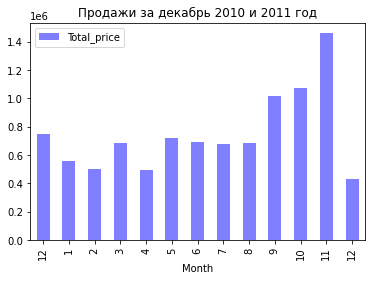

In [136]:
df_date.plot(kind='bar',
x='Month', 
        y='Total_price', 
                   color = 'b',
                   alpha = 0.5,
                   title = 'Продажи с декабря 2010 по 2011 год'
                   
        )

In [243]:
df_11 = df[df['Month']==11]

In [244]:
df_11

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month,Day
431673,573744,21314,SMALL GLASS HEART TRINKET POT,8,2011-11-01 08:16:00,2.10,17733,United Kingdom,16.80,2011,11,1
431674,573744,21704,BAG 250g SWIRLY MARBLES,12,2011-11-01 08:16:00,0.85,17733,United Kingdom,10.20,2011,11,1
431675,573744,21791,VINTAGE HEADS AND TAILS CARD GAME,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,2011,11,1
431676,573744,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,2011,11,1
431677,573744,21915,RED HARMONICA IN BOX,12,2011-11-01 08:16:00,1.25,17733,United Kingdom,15.00,2011,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676,United Kingdom,-0.85,2011,11,30
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676,United Kingdom,-3.29,2011,11,30
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717,United Kingdom,-1.25,2011,11,30
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717,United Kingdom,-7.95,2011,11,30


In [245]:
#df_11['Day'] = pd.DatetimeIndex(df_11['InvoiceDate']).day 
#df_11['Day']=df_11['InvoiceDate'].apply(lambda d: pd.DatetimeIndex(d['InvoiceDate']).day)

In [247]:
df_date_11 = df_11.groupby(['Day'])[['Quantity','Total_price']].sum().reset_index()

In [248]:
df_date_11

,Day,Quantity,Total_price
0,1,16492,28741.55
1,2,28118,45239.06
2,3,34233,62816.55
3,4,34260,60081.76
4,6,23295,42912.40
5,7,30675,70001.08
6,8,26055,56647.66
7,9,36293,62599.43
8,10,38017,68956.24
9,11,28749,54835.51


<AxesSubplot:title={'center':'Продажи за октябрь 2011 года'}, xlabel='Day'>

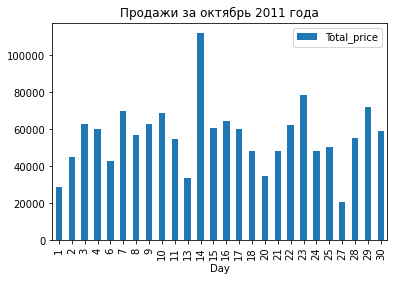

In [249]:
df_date_11.plot(kind='bar',
x='Day', 
        y='Total_price', 
                   title = 'Продажи за октябрь 2011 года'
                   
        )

In [ ]:
# или так

<AxesSubplot:title={'center':'Динамика продаж'}, xlabel='Год', ylabel='Продажи, млн.'>

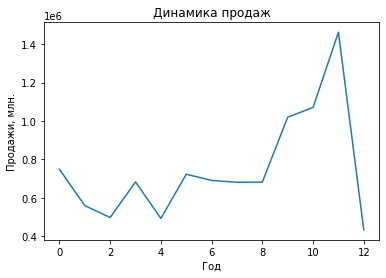

In [137]:
df_date['Total_price'].plot(title='Динамика продаж', 
                                        xlabel='Месяц', 
                                        ylabel='Продажи, млн.')

In [ ]:
# проанализирую возвраты

In [221]:
df_return = df[df.InvoiceNo.str.contains(r'C\d{6}')]
               #&df.StockCode.notin(['D','POST'])]

In [223]:
df_return

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,2010,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,2010,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,2010,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,2011,12
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69,2011,12
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,2011,12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,2011,12


In [225]:
df_return[df_return['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
13052,C537414,POST,POSTAGE,-1,2010-12-06 15:09:00,4.41,16861,United Kingdom,-4.41,2010,12
32383,C539063,POST,POSTAGE,-1,2010-12-15 16:50:00,12.34,15107,United Kingdom,-12.34,2010,12
32402,C539073,POST,POSTAGE,-1,2010-12-15 17:08:00,3.50,12971,United Kingdom,-3.50,2010,12
34591,C539409,POST,POSTAGE,-1,2010-12-17 12:58:00,18.00,12720,Germany,-18.00,2010,12
39905,C539712,POST,POSTAGE,-1,2010-12-21 12:40:00,5.75,15602,United Kingdom,-5.75,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
507999,C579192,POST,POSTAGE,-4,2011-11-28 15:43:00,18.00,12657,France,-72.00,2011,11
509585,C579366,POST,POSTAGE,-1,2011-11-29 11:56:00,9.72,14205,United Kingdom,-9.72,2011,11
513076,C579532,POST,POSTAGE,-1,2011-11-30 09:21:00,18.00,12494,France,-18.00,2011,11
519704,C580161,POST,POSTAGE,-2,2011-12-02 10:49:00,18.00,12700,France,-36.00,2011,12


In [227]:
df[df['CustomerID']=='15107']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
4091,536748,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-02 13:45:00,0.85,15107,United Kingdom,10.20,2010,12
4092,536748,22191,IVORY DINER WALL CLOCK,6,2010-12-02 13:45:00,8.50,15107,United Kingdom,51.00,2010,12
4093,536748,72760B,VINTAGE CREAM 3 BASKET CAKE STAND,2,2010-12-02 13:45:00,9.95,15107,United Kingdom,19.90,2010,12
4094,536748,22634,CHILDS BREAKFAST SET SPACEBOY,2,2010-12-02 13:45:00,9.95,15107,United Kingdom,19.90,2010,12
4095,536748,22426,ENAMEL WASH BOWL CREAM,4,2010-12-02 13:45:00,3.75,15107,United Kingdom,15.00,2010,12
30530,538869,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,6,2010-12-14 14:50:00,2.95,15107,United Kingdom,17.70,2010,12
30531,538869,84968A,SET OF 16 VINTAGE ROSE CUTLERY,1,2010-12-14 14:50:00,12.75,15107,United Kingdom,12.75,2010,12
30532,538869,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,36,2010-12-14 14:50:00,0.85,15107,United Kingdom,30.60,2010,12
32382,C539063,22191,IVORY DINER WALL CLOCK,-6,2010-12-15 16:50:00,8.50,15107,United Kingdom,-51.00,2010,12
32383,C539063,POST,POSTAGE,-1,2010-12-15 16:50:00,12.34,15107,United Kingdom,-12.34,2010,12


In [ ]:
#подумай, как убрать или не убрать POSTAGE?

In [195]:
df_return.groupby('Country')[['Quantity','Total_price']].sum().sort_values('Quantity', ascending = True)

,Quantity,Total_price
Country,,
United Kingdom,-263033,-815291.60
EIRE,-4810,-20177.14
Germany,-1815,-7168.93
France,-1624,-12311.21
USA,-1424,-1849.47
Spain,-1127,-6802.53
Netherlands,-809,-784.80
Japan,-798,-2075.75
Australia,-556,-1444.04


In [113]:
df_plus = df[df['Quantity']>0]

In [114]:
df_plus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12


In [159]:
df_country_plus_Quantity = df_plus.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending = False).reset_index()

In [160]:
df_country_plus_Quantity

,Country,Quantity
0,United Kingdom,4662392
1,Netherlands,200361
2,EIRE,147173
3,Germany,119261
4,France,112103
5,Australia,83901
6,Sweden,36083
7,Switzerland,30629
8,Spain,27940
9,Japan,26016


In [161]:
df_country_plus_Total_price = df_plus.groupby('Country')[['Total_price']].sum().sort_values('Total_price', ascending = False).reset_index()

In [162]:
df_minus = df[df['Quantity']<0]

In [163]:
df_minus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,2010,12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,2010,12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,2010,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13,2011,12
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69,2011,12
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75,2011,12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25,2011,12


In [164]:
df_country_minus_Quantity = df_minus.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending = False).reset_index()

In [165]:
df_country_minus_Total_price = df_minus.groupby('Country')[['Total_price']].sum().sort_values('Total_price', ascending = True).reset_index()

In [166]:
df_joined = df_country_plus_Quantity.merge(df_country_plus_Total_price, on = 'Country', how='outer')

In [167]:
df_joined  = df_joined.merge(df_country_minus_Quantity, on = 'Country', how='outer')

In [168]:
df_joined = df_joined.merge(df_country_minus_Total_price, on = 'Country', how='outer')

In [169]:
df_joined

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y
0,United Kingdom,4662392,9.003098e+06,-263033.0,-815291.60
1,Netherlands,200361,2.854463e+05,-809.0,-784.80
2,EIRE,147173,2.834540e+05,-4810.0,-20177.14
3,Germany,119261,2.288671e+05,-1815.0,-7168.93
4,France,112103,2.097151e+05,-1624.0,-12311.21
5,Australia,83901,1.385213e+05,-556.0,-1444.04
6,Sweden,36083,3.837833e+04,-446.0,-1782.42
7,Switzerland,30629,5.708990e+04,-305.0,-704.55
8,Spain,27940,6.157711e+04,-1127.0,-6802.53
9,Japan,26016,3.741637e+04,-798.0,-2075.75


In [170]:
df_joined['Quantity_y'].sum()

-277574.0

In [171]:
df_minus['Quantity'].sum()

-277574

In [175]:
df_joined['percent_return_Quantity']= df_joined['Quantity_y']/df_joined['Quantity_x']*100*(-1)

In [182]:
df_joined['percent_return_Total_price']= df_joined['Total_price_y']/df_joined['Total_price_x']*100*(-1)

In [188]:
df_joined.sort_values('percent_return_Quantity', ascending =False).head(5)

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y,percent_return_Quantity,percent_return_Total_price
25,USA,2458,3.580390e+03,-1424.0,-1849.47,57.933279,51.655546
36,Bahrain,314,7.541400e+02,-54.0,-205.74,17.197452,27.281407
30,Czech Republic,671,8.267400e+02,-79.0,-119.02,11.773472,14.396304
37,Saudi Arabia,80,1.459200e+02,-5.0,-14.75,6.250000,10.108279
0,United Kingdom,4662392,9.003098e+06,-263033.0,-815291.60,5.641589,9.055678


In [191]:
df_joined.sort_values('percent_return_Total_price', ascending =False).head(5)

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y,percent_return_Quantity,percent_return_Total_price
18,Singapore,5241,21279.29,-7.0,-12158.90,0.133562,57.139594
25,USA,2458,3580.39,-1424.0,-1849.47,57.933279,51.655546
20,Hong Kong,4773,15691.80,-4.0,-5574.76,0.083805,35.526581
36,Bahrain,314,754.14,-54.0,-205.74,17.197452,27.281407
30,Czech Republic,671,826.74,-79.0,-119.02,11.773472,14.396304


In [194]:
df_joined[df_joined['Quantity_y'].isnull()|df_joined['Total_price_y'].isnull()]

,Country,Quantity_x,Total_price_x,Quantity_y,Total_price_y,percent_return_Quantity,percent_return_Total_price
23,Unspecified,3300,4749.79,NaN,NaN,NaN,NaN
24,Canada,2763,3666.38,NaN,NaN,NaN,NaN
26,Iceland,2458,4310.00,NaN,NaN,NaN,NaN
28,United Arab Emirates,982,1902.28,NaN,NaN,NaN,NaN
31,Lithuania,652,1661.06,NaN,NaN,NaN,NaN
33,Lebanon,386,1693.88,NaN,NaN,NaN,NaN
34,Brazil,356,1143.60,NaN,NaN,NaN,NaN
35,RSA,351,1002.31,NaN,NaN,NaN,NaN


In [ ]:
#Самый большой процент возврата по количеству товаров - USA - 57,9% от кол-ва купленных товаров в этой стране, также в TOP-5 по количеству возвратов вошли страны:
#Bahrain - 17,2%, Czech Republic - 11,77%, Saudi Arabia - 6,25%, United Kingdom - 5,64%.
#По общей сумме возвратов в разрезе стран ТОР-5 выглядит следующим образом: Singapore - 57,14% от суммы купленных товаров в этой стране, USA - 51,66%, Hong Kong - 35,53%,
#Bahrain - 27,28%, Czech Republic - 14,4%.
#Возвратов не было в следующих странах: Canada, Iceland, United Arab Emirates, Lithuania, Lebanon, Brazil, RSA.
# 3300 записей в датафрейме не имеют названия страны - Unspecified, следует обратить внимание на корректное 
#заполнение поля с указанием страны. Необходимо выяснить почему не определилась страна при совершении покупки?

In [ ]:
#Какие товары возвращают чаще всего?

In [207]:
df_return.groupby('Description')[['Quantity', 'Total_price']].sum().sort_values('Quantity').reset_index().head(10)

,Description,Quantity,Total_price
0,"PAPER CRAFT , LITTLE BIRDIE",-80995,-168469.60
1,MEDIUM CERAMIC TOP STORAGE JAR,-74494,-77479.64
2,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376,-321.60
3,Manual,-4066,-146784.46
4,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,-6591.42
5,PINK BLUE FELT CRAFT TRINKET BOX,-2617,-2778.77
6,WHITE HANGING HEART T-LIGHT HOLDER,-2578,-6624.30
7,GIN + TONIC DIET METAL SIGN,-2030,-3775.33
8,HERB MARKER BASIL,-1527,-841.05
9,FELTCRAFT DOLL MOLLY,-1447,-3512.65


In [218]:
df_return.groupby('Description')[['Quantity', 'Total_price']].count().sort_values('Quantity', ascending = False).reset_index().head(10)

,Description,Quantity,Total_price
0,Manual,244,244
1,REGENCY CAKESTAND 3 TIER,181,181
2,POSTAGE,126,126
3,JAM MAKING SET WITH JARS,87,87
4,Discount,77,77
5,SET OF 3 CAKE TINS PANTRY DESIGN,74,74
6,SAMPLES,61,61
7,STRAWBERRY CERAMIC TRINKET BOX,55,55
8,ROSES REGENCY TEACUP AND SAUCER,54,54
9,RECIPE BOX PANTRY YELLOW DESIGN,47,47


In [209]:
df[df['Description']=='MEDIUM CERAMIC TOP STORAGE JAR']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,2011,1
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,2011,1
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-05-12 10:10:00,1.04,14646,Netherlands,99.84,2011,5
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2011-05-12 12:11:00,1.25,16745,United Kingdom,5.00,2011,5
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2011-05-12 16:29:00,1.25,14651,United Kingdom,6.25,2011,5
...,...,...,...,...,...,...,...,...,...,...,...
533742,581108,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-07 12:16:00,1.25,15984,United Kingdom,2.50,2011,12
536248,581219,23166,MEDIUM CERAMIC TOP STORAGE JAR,1,2011-12-08 09:28:00,2.46,00000,United Kingdom,2.46,2011,12
539776,581439,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-08 16:30:00,2.46,00000,United Kingdom,4.92,2011,12
540301,581476,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2011-12-09 08:48:00,1.04,12433,Norway,49.92,2011,12


In [212]:
df_return[df_return['Description']=='ROTATING SILVER ANGELS T-LIGHT HLDR']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,-280.80,2010,12
11511,C537251,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9,2010-12-06 10:45:00,2.55,00000,United Kingdom,-22.95,2010,12
44303,C540164,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-6,2011-01-05 12:02:00,2.55,14911,EIRE,-15.30,2011,1
414618,C572473,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-1,2011-10-24 13:34:00,2.55,18188,United Kingdom,-2.55,2011,10


In [213]:
df[df['Description']=='PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,2011,12
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6,2011,12


In [214]:
df_return[df_return['Description']=='FAIRY CAKE FLANNEL ASSORTED COLOUR']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom,-6539.40,2011,4
488525,C577832,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-18,2011-11-22 10:18:00,0.79,18274,United Kingdom,-14.22,2011,11
518995,C580131,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-18,2011-12-01 18:12:00,2.10,17576,United Kingdom,-37.80,2011,12


In [215]:
df_return[df_return['Description']=='PINK BLUE FELT CRAFT TRINKET BOX']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
74461,C542426,20971,PINK BLUE FELT CRAFT TRINKET BOX,-12,2011-01-28 09:32:00,1.25,14146,United Kingdom,-15.00,2011,1
156807,C550171,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1,2011-04-14 16:53:00,1.25,12585,Germany,-1.25,2011,4
235914,C557659,20971,PINK BLUE FELT CRAFT TRINKET BOX,-12,2011-06-21 17:42:00,1.25,16186,United Kingdom,-15.00,2011,6
390544,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029,United Kingdom,-1373.76,2011,10
390548,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,2011-10-11 11:10:00,1.06,16029,United Kingdom,-1373.76,2011,10


In [216]:
df_return[df_return['Description']=='WHITE HANGING HEART T-LIGHT HOLDER']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
14529,C537602,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-07 12:45:00,2.55,17511,United Kingdom,-2.55,2010,12
24911,C538350,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-10 15:01:00,2.55,13798,United Kingdom,-2.55,2010,12
29949,C538834,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-14 13:06:00,2.95,14415,United Kingdom,-2.95,2010,12
34292,C539329,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-500,2010-12-17 09:37:00,2.55,16013,United Kingdom,-1275.00,2010,12
38444,C539576,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-24,2010-12-20 12:25:00,2.95,14911,EIRE,-70.80,2010,12
41349,C539832,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2010-12-22 13:20:00,2.55,17239,United Kingdom,-2.55,2010,12
44903,C540244,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2011-01-05 15:40:00,2.95,17213,United Kingdom,-2.95,2011,1
47274,C540403,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2011-01-07 09:32:00,2.55,17230,United Kingdom,-2.55,2011,1
53474,C540837,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2011-01-11 15:02:00,2.55,14733,United Kingdom,-2.55,2011,1
59911,C541415,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1,2011-01-17 16:20:00,2.55,14292,United Kingdom,-2.55,2011,1


In [128]:
df.groupby('Country')[['Quantity','Total_price']].count().sort_values('Quantity', ascending = False)

,Quantity,Total_price
Country,,
United Kingdom,492981,492981
Germany,9493,9493
France,8556,8556
EIRE,8192,8192
Spain,2532,2532
Netherlands,2367,2367
Belgium,2069,2069
Switzerland,2001,2001
Portugal,1519,1519


<AxesSubplot:>

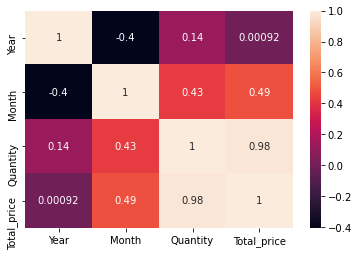

In [90]:
sns.heatmap(df_date.corr(), annot=True)

<AxesSubplot:xlabel='Month'>

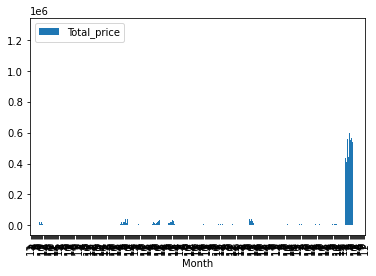

In [79]:
df.groupby(['Country','Year','Month']).sum('Total_price').reset_index().plot(kind='bar', stacked=True,
x='Month', 
        y='Total_price')

<AxesSubplot:title={'center':'Продажи за декабрь 2010 и 2011 год'}, xlabel='Country'>

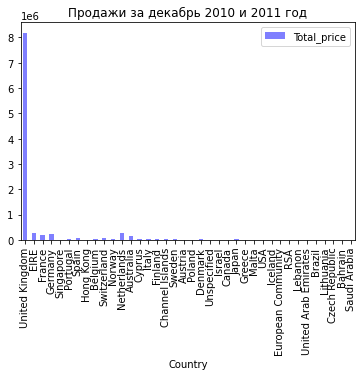

In [86]:
df_country.plot(kind='bar',
x='Country', 
        y='Total_price', 
                   color = 'b',
                   alpha = 0.5                  
        )

<AxesSubplot:ylabel='Total_price'>

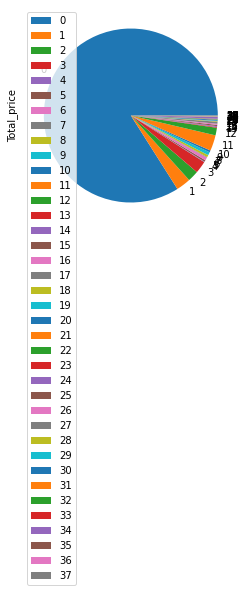

In [88]:
df_country.plot(kind='pie',
x='Country', 
        y='Total_price'              
        )

In [ ]:
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))

In [229]:
df.to_csv("output.csv", index = False, line_terminator ='\n',)

In [230]:
dff = pd.read_csv('output.csv')

In [231]:
dff

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
539389,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12
539390,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
539391,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
539392,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12


# Построение модели

In [ ]:
#Построю модель линейной регрессии и спрогнозирую объемы продаж по месяцам и годам на три месяца вперед.

In [ ]:
#Исключу из данных с общими продажами по месяцам и годам декабрь 2011 года, так как данные за этот месяц
#неполные (по 09.12.2011) - буду прогнозировать продажи на декабрь 2011 в том числе.

In [488]:
df_date_without_1211 = df_date

In [489]:
df_date_without_1211

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [490]:
df_date_without_1211 = df_date_without_1211.drop([12])

In [491]:
df_date_without_1211

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [492]:
#Построю модель линейной регресии
x = df_date_without_1211[['Year', 'Month']]
y = df_date_without_1211['Total_price']

In [493]:
x

,Year,Month
0,2010,12
1,2011,1
2,2011,2
3,2011,3
4,2011,4
5,2011,5
6,2011,6
7,2011,7
8,2011,8
9,2011,9


In [494]:
y

0      748957.020
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
Name: Total_price, dtype: float64

In [495]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [605]:
#Разбиваю данные на тестовые и тренировочные. Данных не много, для проверки оставлю 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 12)

In [606]:
#Для обучения 9 строк
x_train.shape

(9, 2)

In [607]:
y_train.shape

(9,)

In [608]:
#Обучаю модель
model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [609]:
#Подобранные моделью коэффициенты (a)
model.coef_

array([465861.065198  ,  73465.69591822])

In [610]:
#(b)
model.intercept_

-936513372.37899

In [611]:
x_test

,Year,Month
10,2011,10
5,2011,5
9,2011,9


In [612]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_test)
y_pred

array([1067886.6933614 ,  700558.21377039,  994420.9974432 ])

In [613]:
df_date

,Year,Month,Quantity,Total_price
0,2010,12,343197,748957.020
1,2011,1,307940,560000.260
2,2011,2,280684,498062.650
3,2011,3,372131,683267.080
4,2011,4,295170,493207.121
5,2011,5,389870,723333.510
6,2011,6,381851,691123.120
7,2011,7,395731,681300.111
8,2011,8,409426,682680.510
9,2011,9,563391,1019687.622


In [614]:
from sklearn.metrics import mean_squared_error #MSE
#from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2


In [615]:
 #оценке качества модели среднеквадратическая ошибка RMSE
mean_squared_error(y_test,y_pred)
#mean_absolute_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))  # RMSE
#r2_score(y_test,y_pred)


19706.660694440332

In [616]:
#Получается, что наша модель ошибается в среднем на 19,7 тысяч?

In [617]:
 #оценке качества модели коэффициент детерминации R2
r2_score(y_test,y_pred)
#model.score(x_test, y_test)

0.9834426745730095

In [618]:
#У коэффициента детерминации очень высокое значение, модель получилась хорошего качества, но! при других значениях
# random_state был коэффициент детерминации и 0,14, модель получалась очень плохая из-за малого количества данных.

In [ ]:
#Поробую оценить модель  с помощью перекрестной проверки

In [650]:
# Импорт функции cross_val_score из подмодуля model_selection в sklearn
from sklearn.model_selection import cross_val_score
# сохраняю двенадцать оценок в объекте с именем mse
mse = cross_val_score (model, x, y, scoring = 'neg_mean_squared_error', cv = 12)
# беру среднее значение mse для использования в качестве индикатора того, насколько хороша модель
mse.mean()

-54838004216.02201

In [ ]:
#Какая-то ерунда получается.. Помогите разобраться!

In [ ]:
#Посчитаю разницу между прогнозом и фактом

In [633]:
x_test['Month/Year']= x_test.apply(lambda d: str(d['Month'])+'/'+str(d['Year']), axis =1)

<ipython-input-633-9071e4f16934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month/Year']= x_test.apply(lambda d: str(d['Month'])+'/'+str(d['Year']), axis =1)


In [634]:
x_test

,Year,Month,Month/Year
10,2011,10,10/2011
5,2011,5,5/2011
9,2011,9,9/2011


Text(0.5, 1.0, 'Факт и прогноз объема продаж на тестовых данных')

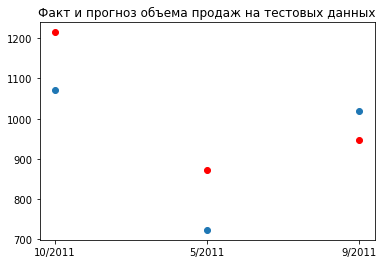

In [654]:
#Синие точки прогноз, красные - фактические значения
plt.scatter(x_test['Month/Year'], y_test/1000)
plt.scatter(x_test['Month/Year'], y_pred/1000, c='r')
plt.title('Факт и прогноз объема продаж на тестовых данных')

In [651]:
y_pred-y_test

10    144113.415198
5     149222.985296
9     -73665.430786
Name: Total_price, dtype: float64

In [652]:
(y_pred-y_test).mean()

73223.65656906036

In [ ]:
#Получается в среднем модель ошиблась на 73 тыс.

In [ ]:
#Спрогнозирую продажи на 3 месяца вперед - декабрь 2012, так как данные за этот месяц были удалены,
#а также январь и февраль 2012.

In [619]:
#Создаю датафрейм с месяцами и годами для прогноза (12.2011-02.2012)
x_pred = pd.DataFrame([{"Year": 2011, "Month":12}, {"Year": 2012, "Month":1}, {"Year": 2012, "Month":2}])

In [620]:
x_pred

,Year,Month
0,2011,12
1,2012,1
2,2012,2


In [622]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_pred)
y_pred

array([1214818.08519793,  872556.49529552,  946022.19121373])

In [623]:
#прибавилю прогнозные данные к фактическим и построю график динамики продаж с прогнозом в том числе

In [624]:
predict = x_pred

In [625]:
predict['Total_price'] = y_pred

In [626]:
predict

,Year,Month,Total_price
0,2011,12,1.214818e+06
1,2012,1,8.725565e+05
2,2012,2,9.460222e+05


In [627]:
df_concat = pd.concat([df_date_without_1211, predict])

In [628]:
df_concat.Month = df_concat.Month.map(str)

In [629]:
df_concat.Year = df_concat.Year.map(str)

In [630]:
df_concat['Month/Year']= df_concat.apply(lambda d: d['Month']+'/'+d['Year'], axis =1)

In [631]:
df_concat

,Year,Month,Quantity,Total_price,Month/Year
0,2010,12,343197.0,7.489570e+05,12/2010
1,2011,1,307940.0,5.600003e+05,1/2011
2,2011,2,280684.0,4.980627e+05,2/2011
3,2011,3,372131.0,6.832671e+05,3/2011
4,2011,4,295170.0,4.932071e+05,4/2011
5,2011,5,389870.0,7.233335e+05,5/2011
6,2011,6,381851.0,6.911231e+05,6/2011
7,2011,7,395731.0,6.813001e+05,7/2011
8,2011,8,409426.0,6.826805e+05,8/2011
9,2011,9,563391.0,1.019688e+06,9/2011


<AxesSubplot:title={'center':'Продажи с прогнозом на 3 месяца'}, xlabel='Month/Year'>

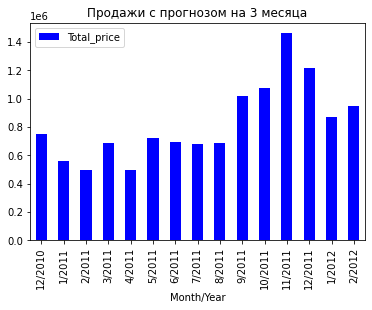

In [632]:
df_concat.plot(kind = 'bar',
x='Month/Year', 
        y='Total_price', 
                   color = 'b',
                   title = 'Продажи с прогнозом на 3 месяца'
                   
        )